<a href="https://colab.research.google.com/github/mjgpinheiro/Econophysics/blob/main/Electricity_Price_per_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Portugal Data Preview:
            Portugal       Electricity prices
0  Residential price                    0.216
1     Business price                    0.145
2            Measure                USD / kWh
3          Reference           September 2023
4  Data availability  March 2019 - March 2024
5     Data frequency                Quarterly

Germany Data Preview:
             Germany       Electricity prices
0  Residential price                    0.402
1     Business price                    0.274
2            Measure                USD / kWh
3          Reference           September 2023
4  Data availability  March 2019 - March 2024
5     Data frequency                Quarterly

USA Data Preview:
                 USA       Electricity prices
0  Residential price                    0.172
1     Business price                    0.151
2            Measure                USD / kWh
3          Reference           September 2023
4  Data availability  March 2019 - March 2024
5     Data fre

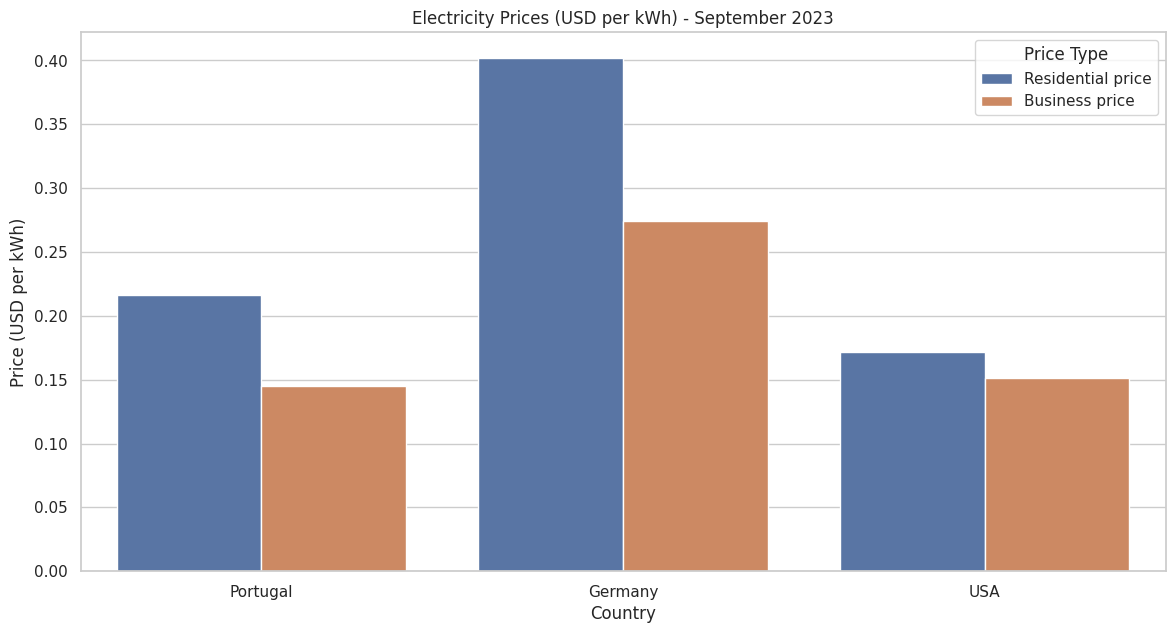

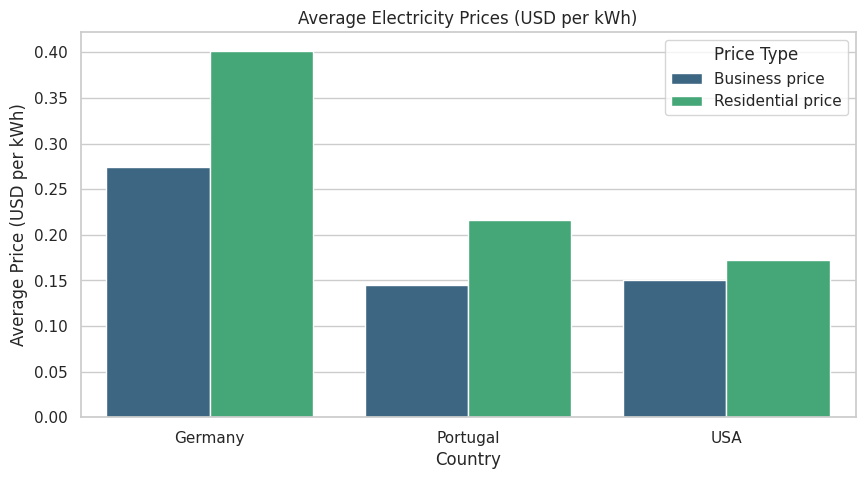

Data saved to 'electricity_prices_comparison.csv'.


In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set(style="whitegrid")

# URLs to fetch electricity prices for the countries
url_pt = "https://www.globalpetrolprices.com/Portugal/electricity_prices/"
url_de = "https://www.globalpetrolprices.com/Germany/electricity_prices/"
url_us = "https://www.globalpetrolprices.com/USA/electricity_prices/"

# Function to fetch data from the URLs
def fetch_data(url, country_name):
    response = requests.get(url)
    tables = pd.read_html(response.text)
    df = tables[0]
    # Manually inspect the data structure
    print(f"\n{country_name} Data Preview:")
    print(df.head(10))
    # Extract relevant rows (assuming rows 0 and 1 contain the actual price data)
    df = df.iloc[:2, [0, 1]]
    df.columns = ['Label', 'Price_USD_per_kWh']
    df['Country'] = country_name
    df['Date'] = '2023-09-01'  # Manually set the date based on the reference date provided
    return df

# Fetch data for each country
data_pt = fetch_data(url_pt, 'Portugal')
data_de = fetch_data(url_de, 'Germany')
data_us = fetch_data(url_us, 'USA')

# Combine the data into a single DataFrame
data_combined = pd.concat([data_pt, data_de, data_us])

# Clean the data
data_combined['Date'] = pd.to_datetime(data_combined['Date'], format='%Y-%m-%d', errors='coerce')
data_combined['Price_USD_per_kWh'] = pd.to_numeric(data_combined['Price_USD_per_kWh'], errors='coerce')

# Print the combined data to debug
print("\nCombined Data:")
print(data_combined.head())

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=data_combined, x='Country', y='Price_USD_per_kWh', hue='Label')
plt.title('Electricity Prices (USD per kWh) - September 2023')
plt.xlabel('Country')
plt.ylabel('Price (USD per kWh)')
plt.legend(title='Price Type')
plt.show()

# Additional analysis: Average price comparison
average_prices = data_combined.groupby(['Country', 'Label'])['Price_USD_per_kWh'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=average_prices, x='Country', y='Price_USD_per_kWh', hue='Label', palette='viridis')
plt.title('Average Electricity Prices (USD per kWh)')
plt.xlabel('Country')
plt.ylabel('Average Price (USD per kWh)')
plt.legend(title='Price Type')
plt.show()

# Save the combined data to a CSV file in the current directory
data_combined.to_csv('electricity_prices_comparison.csv', index=False)

print("Data saved to 'electricity_prices_comparison.csv'.")
